In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
df1=pd.read_csv("original.csv")
df2=pd.read_csv("new_uniform_generated.csv")
df3=pd.read_csv("new_nonuniform_generated.csv")

In [3]:
def noramlized_df(df):
    for cols in df.columns:
        df[cols]=(df[cols]-df[cols].min())/(df[cols].max()-df[cols].min())
    return df

In [4]:
attributes=["w","q"]
haz1=df1[df1["moid"] <= 0.05][attributes]
haz1.reset_index(inplace=True,drop=True)
haz1_all=haz1
haz1=noramlized_df(haz1)
nohaz1 =df1[df1["moid"] > 0.05][attributes]
nohaz1.reset_index(inplace=True,drop=True)
nohaz1=noramlized_df(nohaz1)

In [5]:
haz2=df2[df2["moid"] <= 0.05][attributes]
haz2.reset_index(inplace=True,drop=True)
haz2_all=haz2
haz2=noramlized_df(haz2)
nohaz2 =df2[df2["moid"] > 0.05][attributes]
nohaz2.reset_index(inplace=True,drop=True)
nohaz2_all=nohaz2
nohaz2=noramlized_df(nohaz2)

In [6]:
haz3=df3[df3["moid"] <= 0.05][attributes]
haz3.reset_index(inplace=True,drop=True)
haz3_all=haz3
haz3=noramlized_df(haz3)
nohaz3 =df3[df3["moid"] > 0.05][attributes]
nohaz3.reset_index(inplace=True,drop=True)
nohaz3_all=nohaz3
nohaz3=noramlized_df(nohaz3)
nohaz2=pd.concat([nohaz1,nohaz2,nohaz3])

In [7]:
cluster_nonhaz=DBSCAN(eps=0.018,min_samples=105).fit(nohaz2)


In [8]:
labels = cluster_nonhaz.labels_
merged_labels = np.where((labels == 1) | (labels == 2) | (labels == 3), 6, labels)
merged_labels = np.where((merged_labels == 4) | (merged_labels == 5), 7, merged_labels)


In [9]:
c1 =np.array(nohaz2[merged_labels == 6]) 
c2 = np.array(nohaz2[merged_labels == 7])
c3=np.array(nohaz2[merged_labels == 0])
c4=np.array(nohaz2[merged_labels == -1])

qsplit=0.46
c4_q=c4[:,1]
c41 = c4[np.where(c4_q <= qsplit)]
c42 = c4[np.where(c4_q > qsplit)]

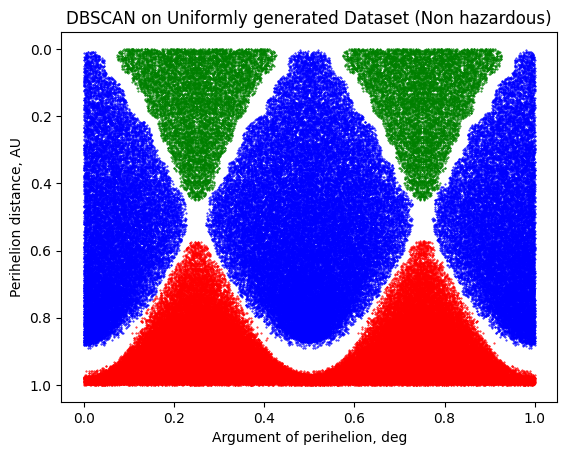

<Figure size 640x480 with 0 Axes>

In [16]:
c1_ = np.column_stack((c3, np.ones(len(c3)) * 1.0))
c2_ = np.column_stack((c1, np.ones(len(c1)) * 2.0)) 
c3_ = np.column_stack((c2, np.ones(len(c2)) * 3.0))

#c1_  upper
#c2_ middle
#c3_ lower

plt.scatter(c1_[:,0],c1_[:,1],color="red",s=0.2)
plt.scatter(c2_[:,0],c2_[:,1],color="blue",s=0.2)
plt.scatter(c3_[:,0],c3_[:,1],color="green",s=0.2)
plt.gca().invert_yaxis()
plt.xlabel("Argument of perihelion, deg")
plt.ylabel("Perihelion distance, AU")
plt.title("DBSCAN on Uniformly generated Dataset (Non hazardous)")
plt.show()
plt.clf()

In [11]:
cluster_haz=DBSCAN(eps=0.025,min_samples=80).fit(haz2)


In [12]:
labels_haz=cluster_haz.labels_
colours = {}
colours[0] = 'orange'
colours[1] = 'red'
colours[-1] = 'white'
cvec = [colours[label] for label in labels_haz]


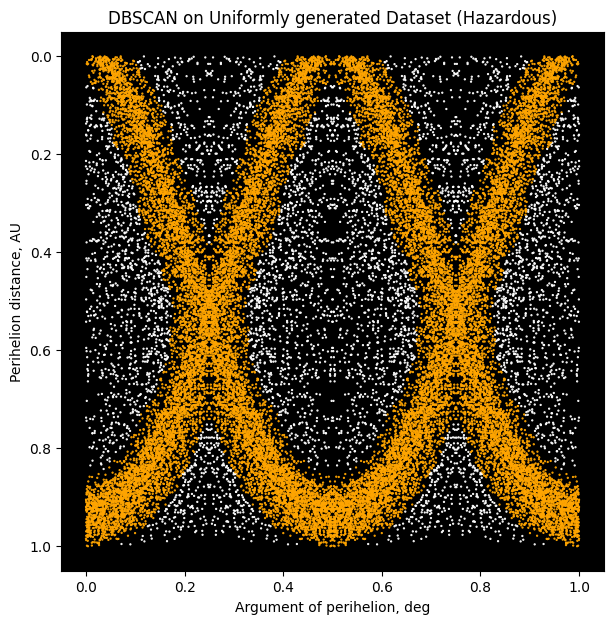

<Figure size 640x480 with 0 Axes>

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_facecolor('black')
ax.scatter(haz2['w'], haz2['q'], c=cvec, s=0.4)

# # Building the legend
# plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Label 0', markerfacecolor='orange', markersize=5),
#                     plt.Line2D([0], [0], marker='o', color='w', label='Label 1', markerfacecolor='red', markersize=5),
#                     plt.Line2D([0], [0], marker='o', color='w', label='Label -1', markerfacecolor='white', markersize=5)],
#            loc='best', title='Legend', facecolor='black', labelcolor='white')

# Set the axis labels and title
plt.gca().invert_yaxis()
plt.xlabel("Argument of perihelion, deg")
plt.ylabel("Perihelion distance, AU")
plt.title("DBSCAN on Uniformly generated Dataset (Hazardous)")

# Show the plot
plt.show()
plt.clf()

In [22]:
c5 =np.array(haz2[labels_haz == 0]) 
c5_ = np.column_stack((c5, np.ones(len(c5)) * 4.0))
# plt.scatter(c5_[:,0],c5_[:,1])
# plt.show()
split_clusters=[c1_,c2_,c3_,c5_]

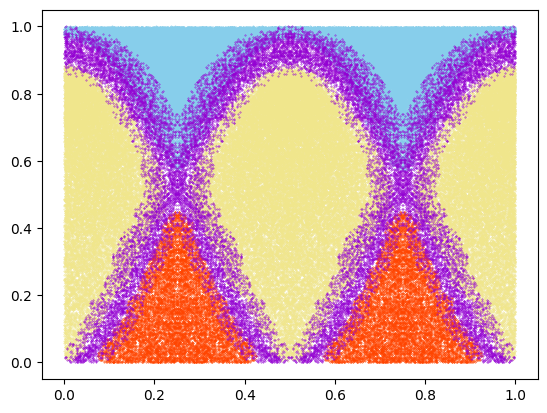

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(split_clusters[0][:,0],split_clusters[0][:,1],color="skyblue",s=0.1)
plt.scatter(split_clusters[1][:,0],split_clusters[1][:,1],color="khaki",s=0.1)
plt.scatter(split_clusters[2][:,0],split_clusters[2][:,1],color="orangered",s=0.1)
plt.scatter(split_clusters[3][:,0],split_clusters[3][:,1],color="darkviolet",s=0.1)
plt.show()
plt.clf()

In [17]:
from sklearn import svm
import seaborn as sns

In [18]:
model=svm.SVC(gamma=6,C=1000)

In [19]:
labelled_data=np.concatenate((c1_,c2_,c3_,c5_))
print(labelled_data)

[[0.97351671 0.98750316 1.        ]
 [0.74471663 0.81479206 1.        ]
 [0.81416856 0.80146835 1.        ]
 ...
 [0.50530845 0.95085876 4.        ]
 [0.14623073 0.34655206 4.        ]
 [0.68883732 0.64252603 4.        ]]


In [20]:
training_x_svm=labelled_data[:,:2]
training_y_svm=labelled_data[:,2]

In [ ]:
model.fit(training_x_svm,training_y_svm)

In [ ]:
print(model.score(labelled_data[:,:2],labelled_data[:,2]))

In [ ]:
haz_real_clf=model.predict(haz1.to_numpy())
nohaz_real_clf=model.predict(nohaz1.to_numpy())

In [ ]:
haz_genu_clf=model.predict(haz2.to_numpy())
nohaz_genu_clf=model.predict(nohaz2.to_numpy())

In [ ]:
haz_gen_clf=model.predict(haz3.to_numpy())
nohaz_gen_clf=model.predict(nohaz3.to_numpy()) 

In [ ]:
print(len(nohaz2))
print(len(nohaz_genu_clf))

In [ ]:
domain_ids=[1,2,3,4]

In [ ]:
import pickle

In [ ]:
haz1_all=df1[df1["moid"] <= 0.05]
haz1_all.reset_index(inplace=True,drop=True)
haz2_all=df2[df2["moid"] <= 0.05]
haz2_all.reset_index(inplace=True,drop=True)
haz3_all=df3[df3["moid"] <= 0.05]
haz3_all.reset_index(inplace=True,drop=True)
nohaz1_all =df1[df1["moid"] > 0.05]
nohaz1_all.reset_index(inplace=True,drop=True)
nohaz2_all =df2[df2["moid"] > 0.05]
nohaz2_all.reset_index(inplace=True,drop=True)
nohaz3_all =df3[df3["moid"] > 0.05]
nohaz3_all.reset_index(inplace=True,drop=True)

In [ ]:
haz_db=haz1_all
nohaz_db=nohaz1_all
haz_clf=haz_real_clf
nohaz_clf=nohaz_real_clf

for i in domain_ids:
    haz_inds = np.where(haz_clf == i)[0]
    nohaz_inds = np.where(nohaz_clf == i)[0]
    haz_rest_inds = np.where(haz_clf != i)[0]
    nohaz_rest_inds = np.where(nohaz_clf != i)[0]
        
    haz_gen_dom = haz_db.iloc[haz_inds]
    nohaz_gen_dom = nohaz_db.iloc[nohaz_inds]
    haz_gen_rest = haz_db.iloc[haz_rest_inds]
    nohaz_gen_rest = nohaz_db.iloc[nohaz_rest_inds]
    
    haz_name="haz_real_domain"+str(i)+".p"
    obj_file = open(haz_name,'wb')
    pickle.dump(haz_gen_dom, obj_file)
    obj_file.close()

    nohaz_name="nohaz_real_domain"+str(i)+".p"
    obj_file = open(nohaz_name,'wb')
    pickle.dump(nohaz_gen_dom, obj_file)
    obj_file.close()
    
    haz_name_rest =  'haz_real_domain'+str(i)+'_rest.p'
    obj_file = open(haz_name_rest,'wb')
    pickle.dump(haz_gen_rest, obj_file)
    obj_file.close()
    
    nohaz_name_rest = 'nohaz_real_domain'+str(i)+'_rest.p'
    obj_file = open(nohaz_name_rest,'wb')
    pickle.dump(nohaz_gen_rest, obj_file)
    obj_file.close()

In [ ]:
haz2_db=haz2_all
nohaz2_db=nohaz2_all
print(len(nohaz2_db))
haz2_clf=haz_genu_clf
nohaz2_clf=nohaz_genu_clf
print(len(nohaz2_clf))

for i in domain_ids:
    haz2_inds = np.where(haz2_clf == i)[0]
    nohaz2_inds = np.where(nohaz2_clf == i)[0]
    haz2_rest_inds = np.where(haz2_clf != i)[0]
    nohaz2_rest_inds = np.where(nohaz2_clf != i)[0]
        
    haz2_gen_dom = haz2_db.iloc[haz_inds]
    nohaz2_gen_dom = nohaz2_db.iloc[nohaz_inds]
    haz2_gen_rest = haz2_db.iloc[haz_rest_inds]
    nohaz2_gen_rest = nohaz2_db.iloc[nohaz_rest_inds]
    
    haz_name="haz_uniform_domain"+str(i)+".p"
    obj_file = open(haz_name,'wb')
    pickle.dump(haz2_gen_dom, obj_file)
    obj_file.close()

    nohaz_name="nohaz_uniform_domain"+str(i)+".p"
    obj_file = open(nohaz_name,'wb')
    pickle.dump(nohaz2_gen_dom, obj_file)
    obj_file.close()
    
    haz_name_rest =  'haz_uniform_domain'+str(i)+'_rest.p'
    obj_file = open(haz_name_rest,'wb')
    pickle.dump(haz2_gen_rest, obj_file)
    obj_file.close()
    
    nohaz_name_rest = 'nohaz_uniform_domain'+str(i)+'_rest.p'
    obj_file = open(nohaz_name_rest,'wb')
    pickle.dump(nohaz2_gen_rest, obj_file)
    obj_file.close()

In [ ]:
haz_db=haz3_all
nohaz_db=nohaz3_all
haz_clf=haz_gen_clf
nohaz_clf=nohaz_gen_clf

for i in domain_ids:
    haz_inds = np.where(haz_clf == i)[0]
    nohaz_inds = np.where(nohaz_clf == i)[0]
    haz_rest_inds = np.where(haz_clf != i)[0]
    nohaz_rest_inds = np.where(nohaz_clf != i)[0]
        
    haz_gen_dom = haz_db.iloc[haz_inds]
    nohaz_gen_dom = nohaz_db.iloc[nohaz_inds]
    haz_gen_rest = haz_db.iloc[haz_rest_inds]
    nohaz_gen_rest = nohaz_db.iloc[nohaz_rest_inds]
    
    haz_name="haz_nonuniform_domain"+str(i)+".p"
    obj_file = open(haz_name,'wb')
    pickle.dump(haz_gen_dom, obj_file)
    obj_file.close()

    nohaz_name="nohaz_nonuniform_domain"+str(i)+".p"
    obj_file = open(nohaz_name,'wb')
    pickle.dump(nohaz_gen_dom, obj_file)
    obj_file.close()
    
    haz_name_rest =  'haz_nonuniform_domain'+str(i)+'_rest.p'
    obj_file = open(haz_name_rest,'wb')
    pickle.dump(haz_gen_rest, obj_file)
    obj_file.close()
    
    nohaz_name_rest = 'nohaz_nonuniform_domain'+str(i)+'_rest.p'
    obj_file = open(nohaz_name_rest,'wb')
    pickle.dump(nohaz_gen_rest, obj_file)
    obj_file.close()